This notebook is a detailed exploration of the data in the 'Newyork Airbnb dataset' as well as the price prediction accuracy testing with different models.<br> 
**Problem Definition**: Predict the prices of the room on the basis of the given parameters to rightly decide the costing to increase profit and improve customer service.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
df=pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df['reviews_per_month'].fillna(value=0,inplace=True)

There are some columns that does not affect or contribute in predicting price.

In [4]:
df.drop(['id','name','host_id','host_name','latitude','longitude','last_review','calculated_host_listings_count'],axis=1,inplace=True)

The price data is somewhat positively skewed. Therefore to make the distribtion balanced, prices above 1000 are removed from dataset.

In [5]:
df.drop(df[df.price>1000].index,inplace=True)

In [6]:
df.drop(df[df.price==0].index,inplace=True)

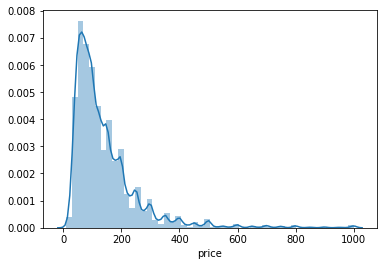

In [7]:
sns.distplot(df['price'])

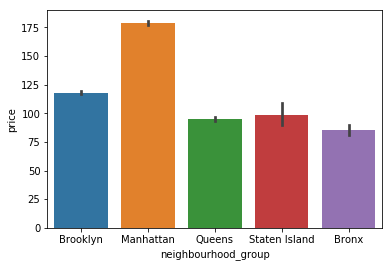

In [8]:
sns.barplot('neighbourhood_group','price',data=df)

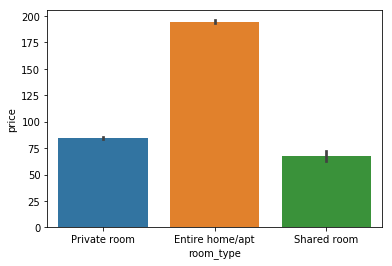

In [9]:
sns.barplot('room_type','price',data=df)

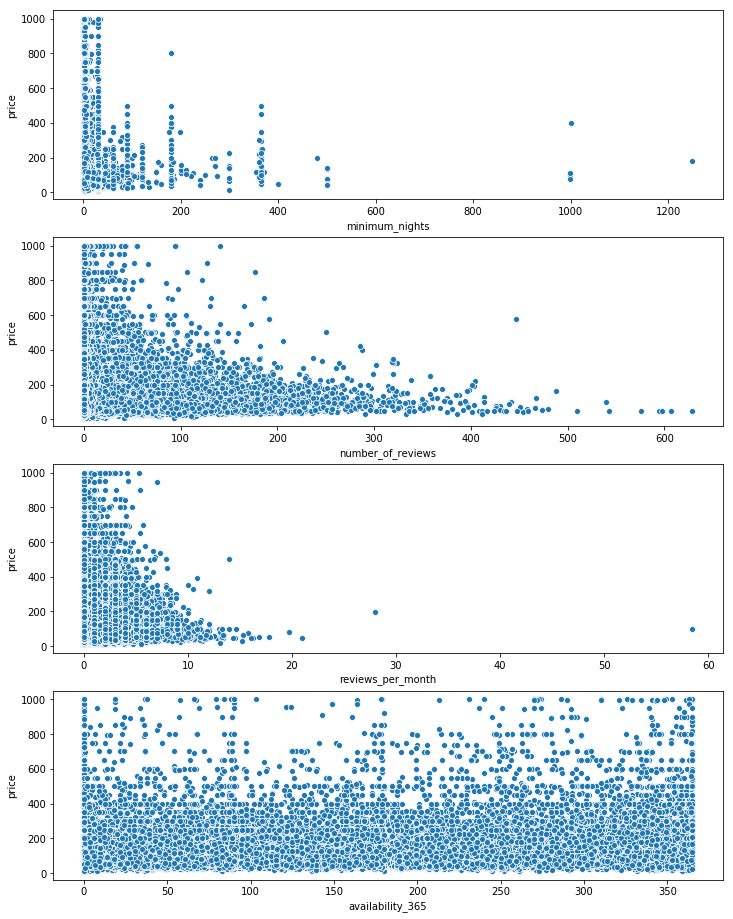

In [10]:
fig=plt.figure(figsize=(12,16))
ax1=fig.add_subplot(411)
sns.scatterplot('minimum_nights','price',data=df,ax=ax1)
ax2=fig.add_subplot(412)
sns.scatterplot('number_of_reviews','price',data=df,ax=ax2)
ax3=fig.add_subplot(413)
sns.scatterplot('reviews_per_month','price',data=df,ax=ax3)
ax4=fig.add_subplot(414)
sns.scatterplot('availability_365','price',data=df,ax=ax4)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48645 entries, 0 to 48894
Data columns (total 8 columns):
neighbourhood_group    48645 non-null object
neighbourhood          48645 non-null object
room_type              48645 non-null object
price                  48645 non-null int64
minimum_nights         48645 non-null int64
number_of_reviews      48645 non-null int64
reviews_per_month      48645 non-null float64
availability_365       48645 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 4.6+ MB


In [12]:
categorical=['neighbourhood_group','neighbourhood','room_type']
#numeric=['id','host_id','price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']
cat_df=pd.get_dummies(df[categorical])
#num_df=df[numeric].apply(pd.to_numeric)
df=pd.concat([df,cat_df],axis=1)

In [13]:
df.drop(['neighbourhood_group','neighbourhood','room_type'],axis=1,inplace=True)

In [14]:
df=df.drop_duplicates()

In [15]:
price=df['price']
df.drop('price',axis=1,inplace=True)

In [16]:
pca_df=PCA(n_components=15).fit_transform(df)

In [17]:
ny_df=pd.DataFrame(pca_df,columns=['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11','feature12','feature13','feature14','feature15'])

In [18]:
ny_train,ny_test,price_train,price_test = train_test_split(ny_df,price,test_size=0.33)

In [19]:
ny_lr=LinearRegression().fit(ny_train,price_train)
ny_svm=svm.SVR().fit(ny_train,price_train)
ny_rf=RandomForestRegressor().fit(ny_train,price_train)

print('-----------Scores-------------')
print('Linear Regression:{}\n'.format(ny_lr.score(ny_test,price_test)))
print('SVM:{}\n'.format(ny_svm.score(ny_test,price_test)))
print('Random Forest:{}'.format(ny_rf.score(ny_test,price_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-----------Scores-------------
Linear Regression:0.3098697457190681

SVM:0.007982612855334525

Random Forest:0.32521415060088305


**Conclusion**: Random Forest seems to work well here without much feature engineering. Here during PCA features have been reduced from 233 to 15. Algorithms behave differently with different number of features. More features can be tested for the effectiveness of price prediction like longitude, latitude, name (separating adjectives like cozy, clean, spacious etc.).